# Etapa de Pré-Processamento

O ideal é que esta etapa seja realizada enquanto os dados estejam crus (antes de transformar em um objeto MNE ou transformado em um `RawData`). Esta afirmação ocorre pois os dados transformados em um objeto MNE `Epoch` ou `Evoked` não possuem todo os métodos para aplicar os **filtros temporais**, por exemplo, a ausência da negação de frequência (*notch_filter*).

Contudo, podemos obter bons resultados com filtros passa-baixa (*low pass*) ou passa-alta (*high pass*), configurando valores abaixo e acima da frequência de corte desejada respectivamente.

In [27]:
import matplotlib
import mne

%matplotlib inline

In [28]:
# carregamento do dataset (FIF file)
epochs = mne.read_epochs('ssvep-epo.fif')
print(epochs)
# filtranndo apenas alguns canais
epochs.pick_channels(['E108', 'E109', 'E116', 'E125', 'E118', 'E117', 'E126',
                      'E139', 'E127', 'E138', 'E140', 'E150', 'E151'])
print(epochs)
# configurando um evento para apresentação dos resultados
event = '4'

Reading ssvep-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    4995.85 ms
        0 CTF compensation matrices available
125 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
<EpochsFIF  |   125 events (all good), 0 - 4.99585 sec, baseline off, ~294.8 MB, data loaded,
 '1': 25
 '2': 25
 '3': 30
 '4': 25
 '5': 20>
<EpochsFIF  |   125 events (all good), 0 - 4.99585 sec, baseline off, ~15.1 MB, data loaded,
 '1': 25
 '2': 25
 '3': 30
 '4': 25
 '5': 20>


    Using multitaper spectrum estimation with 7 DPSS windows


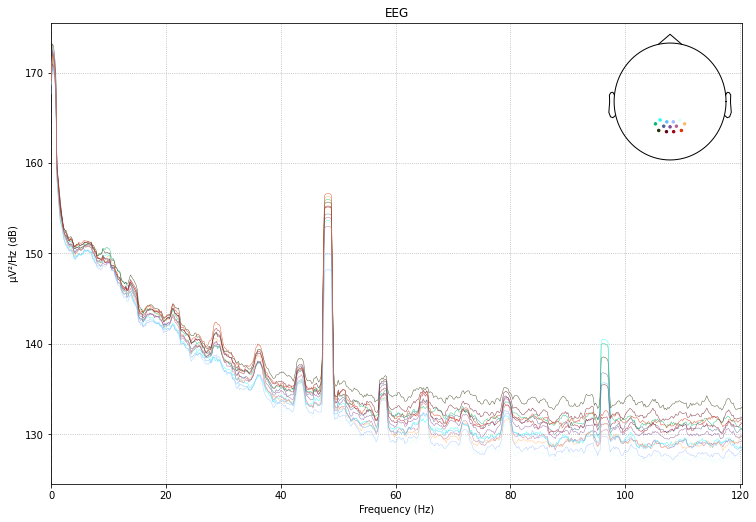

In [29]:
# apresentando o gráfico de um único evento com todos os eletrodos escolhidos SEM FILTRO
matplotlib.rcParams['figure.figsize'] = [12., 8.]
epochs[event].plot_psd()
print('')

## Filtros temporais

Apesar do nome ocorrer como "temporal", o resultado destes filtros ficam melhor visíveis em um gráfico do domínio da frequência, ao invés do domínio do tempo como o nome sugere. O filtro é dito temporal pois influencia diretamente na **periodicidade** das diversas frequências presentes em um sinal de EEG por exemplo. Mesmo que singelo, é possível perceber que o gráfico no domínio do tempo é mais suave de acordo com a quantidade de frequência "excluída" do sinal. Porém, vemos a diferença direta no domínio da frequência.

Existem 4 tipos de filtros temporais a saber:
- passa-alta (*high pass*)
- passa-baixa (*low pass*)
- passa-faixa (*band pass*)
- rejeita-faixa (*notch*)

Mostraremos o resultado de cada um deles (e o *notch filter* quebrando em `Raw`)

### *High pass filter*

Setting up low-pass filter at 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 227 samples (0.942 sec)

    Using multitaper spectrum estimation with 7 DPSS windows


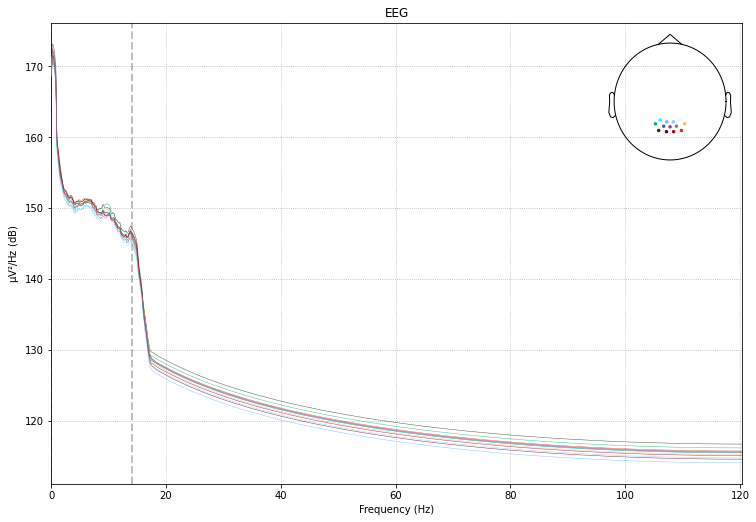

In [30]:
epo_h = epochs.copy().filter(l_freq=None, h_freq=14.)
epo_h[event].plot_psd()
print('')

Onde ocorre a "quebra" do sinal ou aplicação do filtro, é mostrado uma linha pontilhada, indicando para o *high-pass* que a partir daquele ponto (14 Hz) a frequência foi cortada. 

### *Low pass filter*

Setting up high-pass filter at 5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Filter length: 399 samples (1.656 sec)

    Using multitaper spectrum estimation with 7 DPSS windows


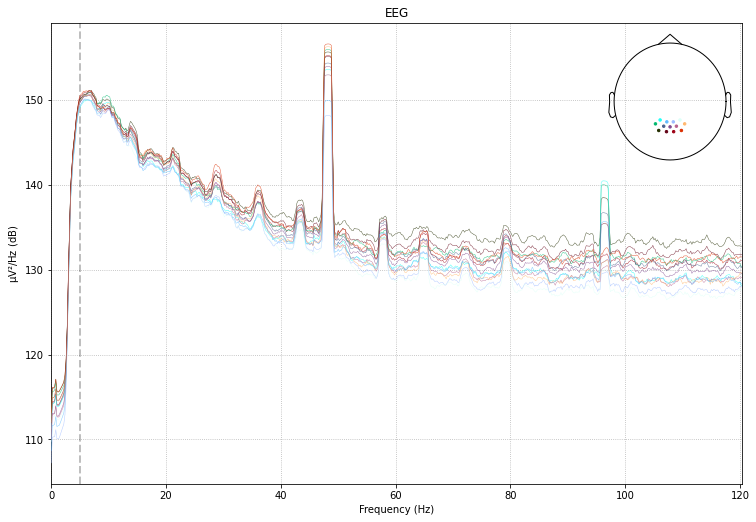

In [31]:
epo_l = epochs.copy().filter(l_freq=5, h_freq=None)
epo_l[event].plot_psd()
print('')

Aqui percebemos o corte das frequências abaixo de 5 Hz e o restante do sinal igual ao original.

### *Band pass filter*

Setting up band-pass filter from 5 - 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 399 samples (1.656 sec)

    Using multitaper spectrum estimation with 7 DPSS windows


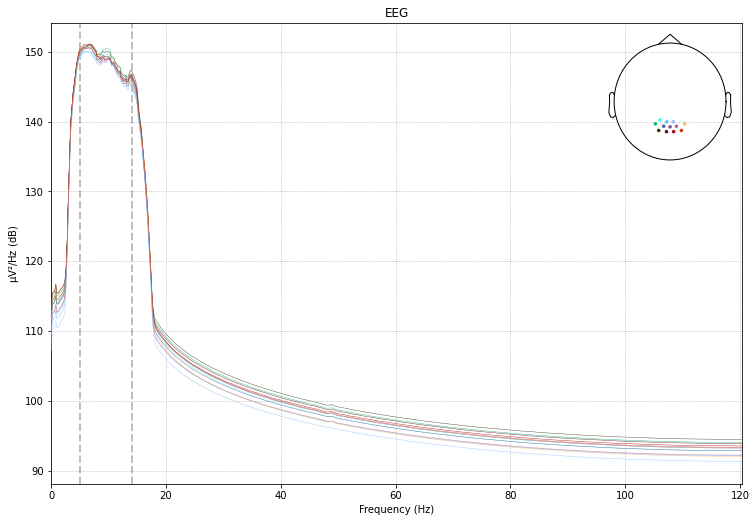

In [32]:
epo_b = epochs.copy().filter(l_freq=5, h_freq=14)
epo_b[event].plot_psd()
print('')

Neste exemplo vimos que é possível realizar o corte das frequências acima e abaixo do desejado. Porém, o resultado do que foi cortado acima e abaixo das frequências não foi igual ao resultado apresentado no corte das frequências originais. Iremos analisar isso com mais detalhes aplicando *low* e *high filter* em sequência e comparar com o resultado gerado anteriormente, obtendo algo bem parecido.

Setting up high-pass filter at 5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Filter length: 399 samples (1.656 sec)

Setting up low-pass filter at 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 227 samples (0.942 sec)

    Using multitaper spectrum estimation with 7 DPSS windows


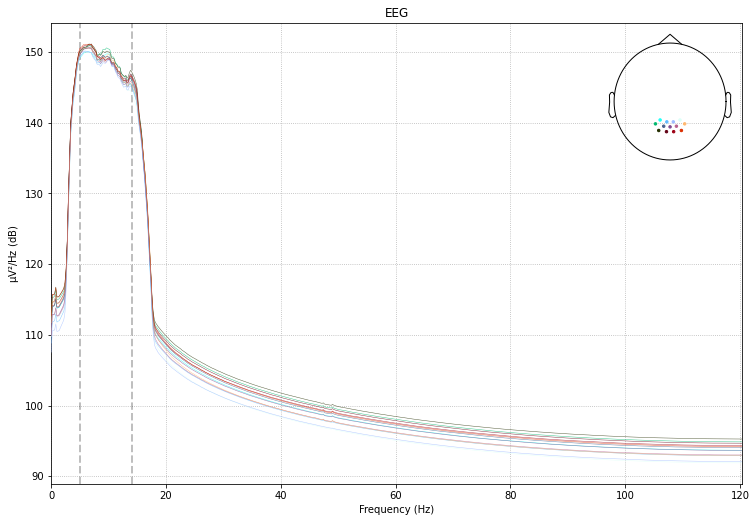

In [33]:
epo_b2 = epochs.copy().filter(l_freq=5, h_freq=None)
epo_b2.filter(l_freq=None, h_freq=14)
epo_b2[event].plot_psd()
print('')

Por fim, o *notch*, após reduzir o objeto para um `Raw` para simples visualização.

### notch filter

Creating RawArray with float64 data, n_channels=13, n_times=150625
    Range : 0 ... 150624 =      0.000 ...   624.996 secs
Ready.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1591 samples (6.602 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB c

<ipython-input-38-1f32851f92d5>:22: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmin=5,fmax=14)


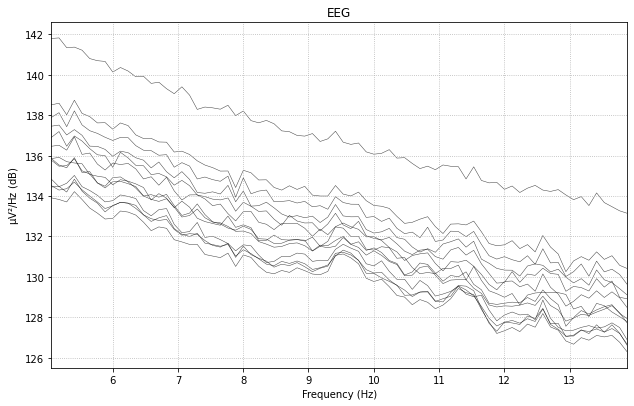

In [38]:
import numpy as np

a = epochs.copy()
a = a.get_data()
a = a.transpose(1, 0, 2)
#  a = a.reshape(a.shape[0], a.shape[1]* a.shape[2])
a = a.reshape(13, 125 * 1205)

# criando o objeto `info` (o restante dos valores já temos)
info = mne.create_info(ch_names=13,
                       sfreq=241.,
                       ch_types='eeg')

raw = mne.io.RawArray(a, info)


# raw.notch_filter?
raw.notch_filter(np.arange(50,101,50))
raw.filter(l_freq=5, h_freq=14)
# raw.notch_filter(np.arange(50, 251, 50))
matplotlib.rcParams['figure.figsize'] = [10., 6.]
raw.plot_psd(fmin=5,fmax=14)
print()

### Aplicações multiplas de filtros causam diferença?

Vamos analisar o que acontece se atenuarmos diversas vezes o mesmo filtro.

In [ ]:
# aplicar os filtros N vezes necessárias e verificar se há modificações

# realizar ZOOM nas abcissas (frequência) para ver os sinais filtrados "mais de perto"
print('')

## Filtros espaciais

Filtros espaciais são utilizados para escolher canais de dados que melhor respondem a uma determinada tarefa. No caso do paradigma SSVEP, espera-se encontrar o conjunto de eletrodos que possuem respostas mais significativas em relação à frequências evocadas. Um algoritmo muito utilizado para este fim é o CAR (*Common Average Reference*).

Uma filtragem espacial pelo método CAR subtrai os artefatos comuns a todos os eletrodos. Comumente em BCI, para a redução de sinais não desejados, são posicionados eletrodos de referência em locais que tentam subtrair os potenciais comuns em todos os outros eletrodos. A técnica de filtragem espacial CAR reduz as componentes que estão em maior número nos eletrodos, subtraindo cada amostra do sinal pelo valor médio da diferença de potencial calculada para todos os eletrodos e a diferença aferida em cada eletrodo.

O método CAR é definito como:

\begin{equation}
V_i^{CAR} = V_i^{ER} - \frac{1}{N_e} \sum\limits_{j=1}^{N_e} V_j^{ER}
\end{equation}

onde $V_i^{ER}$ é o potencial do i-ésimo eletrodo e ${N_e}$ é o número de eletrodos utilizados.

No MNE a implementação do CAR se dá pela aplicação do método `set_eeg.reference`:

In [ ]:
epo_ref = mne.set_eeg_reference(epochs, ref_channels=['E116', 'E126', 'E150'])

### Questões de projeto

1. Como saber quais são os eletrodos a serem utilizados como referência?
    R: Depende o tipo de informação que você quer coletar, cada eletrodo tem uma identificação dizendo
    a qual parte do cérebro ele está localizando e lendo: ré-frontal (Fp), frontal (F), temporal (T), 
    parietal (P), occipital (O) e central (C). Para saber o melhores eletrodos você tem que saber que
    tipo de informação deseja coletar.
    
2. A média de TODOS os eletrodos é um bom chute?
    R: Depende de como está a potencia de cada eletrodo e para o que você quer, mas nesse não. Pois
    quando se pega a média algumas eletrodos que estavam bons ficaram ruins, então o melhor resultado
    foi selecionar apenas alguns, o que gerou resultados melhoras.
3. Como utilizar as informações de retorno do método `set_eeg_reference`
    R: O retorno será uma nova instância de um dos três objetos que você passar: raw, epoch ou evoked. No nosso
    caso vai ser W. Realizando uma referência à outros canais quer dizer que, serão potencializados 
    as  componentes presentes nos canais utilizados como referência. O sinal tende a ficar mais padronizado.